## Description of Dataset

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes. We can use this dataset to predict the "mpg" of cars which is targete in this dataset. 


Target Information
1. mpg: continuous

Attribute Information:

1. cylinders: multi-valued discrete
2. displacement: continuous
3. horsepower: continuous
4. weight: continuous
5. acceleration: continuous
6. model_year: multi-valued discrete
7. origin: multi-valued discrete
8. car_name: string (unique for each instance)

[Reference](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

## Summary

To get familiar with the nature of dataset, a brief EDA (statistical and visual) was conducted initially.
After splitting dataset to train and test sets, we make a regression model to predict "mpg", using eight given  attributes. To get familiar with handling of both numerical and categorical data, this dataset was selected. Categorical data converted to dummy varibale to be able to use them in the regression model.

### Import Libraries

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Choosing a name for columns

In [42]:
col_names = ['mpg', 'cylinders', 'displacement ', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

In [43]:
# seperating data with one or more space
# Assigning column names as the header of dataset
df1 = pd.read_csv('data/Auto_MPG_Data_Set/auto-mpg.data.csv', names = col_names, sep = '\s+')

In [44]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [45]:
# Putting target as the last col
df1 = df1[ ['cylinders', 'displacement ', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name', 'mpg']]

In [46]:
df1.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [47]:
#dropping any rows with "?" parameter
df1 = df1[~(df1 == '?').any(axis=1)]

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [48]:
#A summary of dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cylinders      392 non-null    int64  
 1   displacement   392 non-null    float64
 2   horsepower     392 non-null    object 
 3   weight         392 non-null    float64
 4   acceleration   392 non-null    float64
 5   model_year     392 non-null    int64  
 6   origin         392 non-null    int64  
 7   car_name       392 non-null    object 
 8   mpg            392 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [49]:
#Descriptive statistics 
df1.describe()

,cylinders,displacement,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531,23.445918
std,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518,7.805007
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


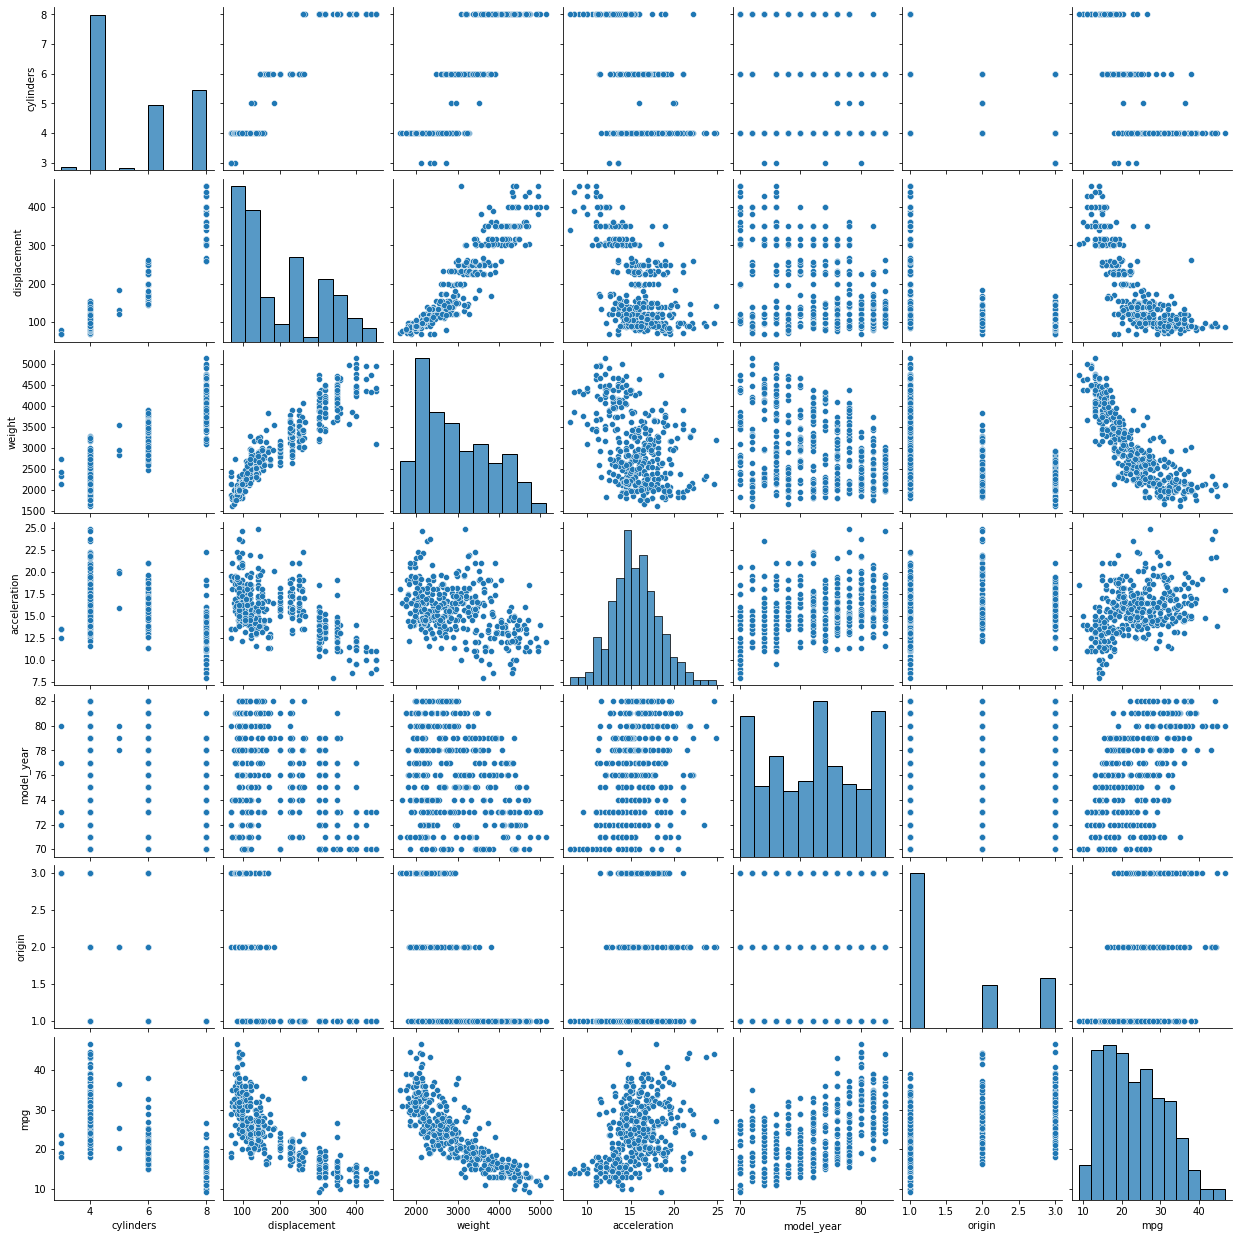

In [50]:
#pairwise relationships between attributes of the dataset
sns.pairplot(df1)

Below we can see distribution of cars' horsepower

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

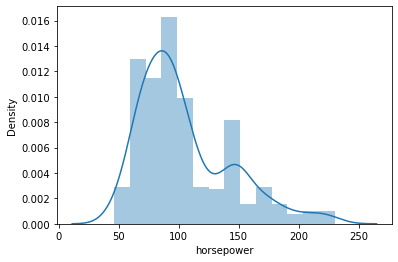

In [51]:
sns.distplot(df1['horsepower'])

Below we can see a summary of correlation between "mpg" as the target value and each attribute in the form of bar charts.

Text(0, 0.5, 'mpg')

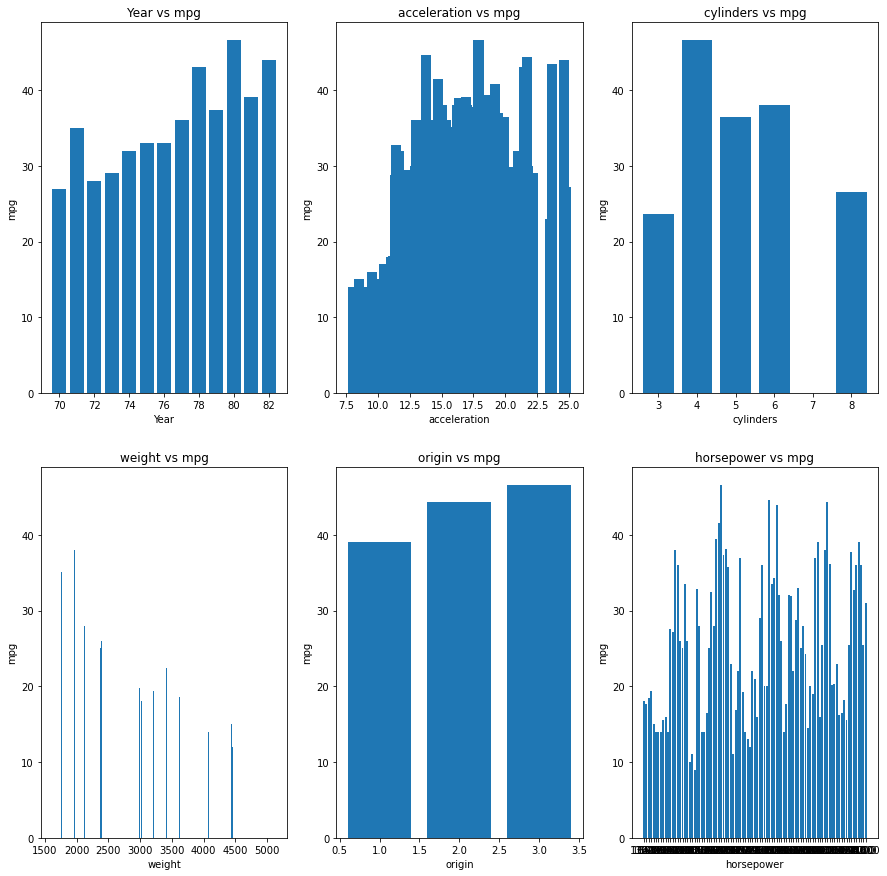

In [52]:
fig, axs = plt.subplots(nrows=2, ncols =3, figsize=(15,15))
axs[0,0].bar(df1.model_year, df1.mpg)
axs[0,0].set_title('Year vs mpg')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('mpg')

axs[0,1].bar(df1.acceleration, df1.mpg)
axs[0,1].set_title('acceleration vs mpg')
axs[0,1].set_xlabel('acceleration')
axs[0,1].set_ylabel('mpg')

axs[1,0].bar(df1.weight, df1.mpg)
axs[1,0].set_title('weight vs mpg')
axs[1,0].set_xlabel('weight')
axs[1,0].set_ylabel('mpg')


axs[1,1].bar(df1.origin, df1.mpg)
axs[1,1].set_title('origin vs mpg')
axs[1,1].set_xlabel('origin')
axs[1,1].set_ylabel('mpg')


axs[1,2].bar(df1.horsepower, df1.mpg)
axs[1,2].set_title('horsepower vs mpg')
axs[1,2].set_xlabel('horsepower')
axs[1,2].set_ylabel('mpg')


axs[0,2].bar(df1.cylinders, df1.mpg)
axs[0,2].set_title('cylinders vs mpg')
axs[0,2].set_xlabel('cylinders')
axs[0,2].set_ylabel('mpg')


As we can see above we can visually see correlation between the "mpg" and most of attributes. For example lookinf and the "year" vs "mpg", the newer cars have higher mpg which makes sense.  In the first look, it seems weight would have the most powerful correlation with the "mpg", let's see how accurate is this prediction!

Before starting any modeling, we need to convert car_name attribute to dummy attributes.

In [53]:
#Shape of dataframe before conversion.
df1.shape

(392, 9)

In [54]:
#Number of samples for each dummy variable will be as below.
df1['car_name'].value_counts()

ford pinto                5
amc matador               5
toyota corolla            5
chevrolet chevette        4
peugeot 504               4
                         ..
fiat x1.9                 1
plymouth sapporo          1
vw rabbit custom          1
dodge aries wagon (sw)    1
maxda glc deluxe          1
Name: car_name, Length: 301, dtype: int64

As we can see below, totally we will have 301 dummy variables which will be replaced with the categorical variable (car_name).

In [55]:
len(df1.car_name.unique())

301

One common solution is to convert that column to dummy columns as below. 

**Question:**  What if I disregard that categorical column instead of converting that to dummy variables. Would it reduce the score?

In [56]:
## Converting "car_name" to dummy variables.
df1 = pd.get_dummies(df1, columns = ['car_name'])

In [57]:
#shape of new dataframe
df1.shape

(392, 309)

In [58]:
#list of all of the columns in the new df1
cols = list(df1.columns) 

Moving "mpg" to the end of table as the target value.

In [59]:
#Remove "mpg" from list
cols.pop(cols.index('mpg')) 
#Creating new dataframe with columns in the new order
df1 = df1[cols+['mpg']] 

Below we can see how dummy variables are added to the dataframe.

In [60]:
df1.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name_amc ambassador brougham,car_name_amc ambassador dpl,car_name_amc ambassador sst,...,car_name_volvo 244dl,car_name_volvo 245,car_name_volvo 264gl,car_name_volvo diesel,car_name_vw dasher (diesel),car_name_vw pickup,car_name_vw rabbit,car_name_vw rabbit c (diesel),car_name_vw rabbit custom,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,17.0


In [61]:
#Splitting dataset to train and test with the ratio of 0.5.
X_train, X_test, y_train, y_test = train_test_split(df1.values[:, :308], df1.values[:, 308], test_size = 0.5, random_state=0)

In [62]:
# Instantiate first model (Ordinary least squares Linear Regression)
regr1 = linear_model.LinearRegression()

In [63]:
#train model
regr1.fit(X_train, y_train)

LinearRegression()

In [64]:
#predit on the X_test
y_pred = regr1.predict(X_test)

In [65]:
#calculate r2 score
regr1.score(X_test,y_test)
#Or we could use the following command:
#r2_score(y_test,y_pred)

0.7823033262790031

In [66]:
mean_squared_error(y_test,y_pred)

12.964183899659808

As we can see above, since r2 is between 1 and zero, it is usually a better criteria to judge about the function of model, than using mean_squared_error.

In [67]:
#learnt coefficients by reg1
regr1.coef_

array([-1.51748456e+00,  2.71458368e-02, -1.48818099e-01, -1.53086525e-03,
       -6.14748681e-01,  5.94427173e-01,  1.37921869e+00,  1.75664888e-01,
        3.88436617e+00,  1.29782851e-11, -1.38935682e+00,  7.07878201e-13,
       -1.82520665e-12, -2.31828572e+00, -2.70624936e+00, -3.35289248e+00,
       -3.45144107e+00,  1.60062091e+00, -4.46836556e+00,  1.31095135e-12,
        2.77943377e+00,  5.66435787e-13, -9.43245482e-13, -6.14883246e+00,
        1.30873090e-12, -2.06590300e-12,  8.03638229e+00,  2.48169658e+00,
        3.26356224e+00, -1.15199517e-12, -2.05682269e+00,  2.10373202e+00,
        3.36536354e-13,  7.12319093e-13, -2.87121195e+00,  5.76759306e+00,
        6.08106220e+00,  6.44579397e-01, -1.27298172e-12,  1.78198337e+00,
        1.45639056e-12, -3.41462112e+00,  2.16959783e-12,  2.15383267e-12,
        3.49498521e+00, -6.33493258e-13, -1.57190379e+00,  1.88160598e-12,
        1.71781849e-12, -1.06092912e-12, -6.09290396e-13,  9.66181561e-01,
        5.66110197e+00,  

Since we have 308 attributes after making dummy columns, we have 308 coefficient as well.

In [68]:
#Intercept of reg1 model
regr1.intercept_

9.074146877427175

Now let's see how LASSO would affect the result by reducing the complexity of model.

In [69]:
#Instantiate a lasso model with default keywords (alpha=1.0)
lasso1 = linear_model.Lasso()
#training model.
lasso1.fit(X_train, y_train)
#calculate r2
lasso1.score(X_test,y_test)

0.8094553559877776

As we can see the r2 increased from 0.78 (for normal reg model) to 0.81 when using lasso model (with alpha=1.0).

In [70]:
#coefficients of lasso1
lasso1.coef_

array([-0.00000000e+00, -4.96047090e-04, -1.38682196e-02, -6.10368776e-03,
        0.00000000e+00,  6.75399291e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

As we can infer from the above coefficients, model got simplified by zeroing all coefficients exept indecies 1,2,3 and 5. Between these attributes not all of them have the same weight. For example index 5,2,3  and 1 have higher weights repectively. As results, year and hourse power are the most effective variables determining mpg of a car.

In [71]:
y_pred1 = lasso1.predict(X_test)

In [72]:
mean_squared_error(y_test,y_pred1)

11.34723725377439

In [73]:
lasso2 = linear_model.Lasso(alpha=.1)
lasso2.fit(X_train, y_train)
lasso2.score(X_test,y_test)

0.8200920321854485

Above we can see the r2 even increased further when using alpha = 0.1 instead of the default alpha = 1.0. I tried lower and higher alpha but they led to lower r2, therfore, I stopped at 0.1 as the optimum alpha.

In [74]:
lasso2.coef_

array([-0.        ,  0.00872361, -0.01044207, -0.00637951,  0.15110913,
        0.7618038 ,  1.0658492 , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.  

By redducing alpha from 1 to 0.1 R2 score increased from 0.809 to 0.820. Also "acceleration" coeficient came back to the regression model as an effective coefficient (non zero). AS observed, reducing alpha makes the losso model to involve more number of coefficients.

In [75]:
y_pred2 = lasso2.predict(X_test)

In [76]:
mean_squared_error(y_test,y_pred2)

10.713806232754433

**What if we only train the model on attributes with highest coefficient for each model. For example model_year and origin for lasso1 and lasso2, respectively.**

#### Training only on "model_year" attribute

In [77]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df1.values[:, np.newaxis,5], df1.values[:, np.newaxis,308], test_size = 0.5, random_state=0)

In [78]:
X_train2.shape

(196, 1)

In [79]:
lasso3 = linear_model.Lasso()
lasso3.fit(X_train2, y_train2)
lasso3.score(X_test2,y_test2)

0.32185167925372427

In [80]:
lasso3.coef_

array([1.19197266])

In [81]:
y_pred3 = lasso3.predict(X_test2)

In [82]:
mean_squared_error(y_test2,y_pred3)

40.38481337876432

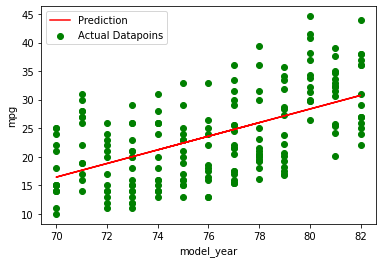

In [83]:
plt.scatter(X_test2,y_test2, color='GREEN', label = 'Actual Datapoins')
plt.plot(X_test2,y_pred3, color='RED',label= 'Prediction')
plt.xlabel('model_year')
plt.ylabel('mpg')
plt.legend()

Above we can see the real datapoints and the prediction line achived by the predictions of lasso3 on the X_test2.
As we can see, points have considerable distance from the prediction line, and that has led to a poor r2.

#### Training only on "origin" attribute

In [80]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df1.values[:, np.newaxis,6], df1.values[:, np.newaxis,308], test_size = 0.5, random_state=0)

In [81]:
lasso4 = linear_model.Lasso()
lasso4.fit(X_train3, y_train3)
lasso4.score(X_test3,y_test3)

0.3021506760776317

In [82]:
lasso4.coef_

array([3.77888555])

In [83]:
y_pred4 = lasso4.predict(X_test3)

In [84]:
mean_squared_error(y_test3,y_pred4)

41.55803951868219

Now let's have a look at the actual datapoints in comparison with the linear regression prediction line.?

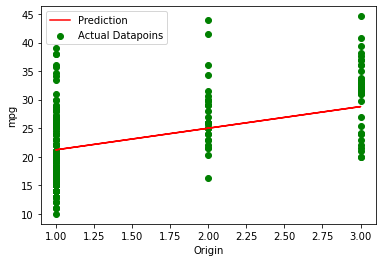

In [91]:
plt.scatter(X_test3,y_test3, color='GREEN', label = 'Actual Datapoins')
plt.plot(X_test3,y_pred4, color='RED',label= 'Prediction')
plt.xlabel('Origin')
plt.ylabel('mpg')
plt.legend()

Also below we conduct training on the attributes with the highest cooefficient for the normal linear regression model.Some dummy variables had higher coefficient but they could not be used for training a model and achiving an acceptable r2 (I tried). Then I selected one of the numerical viables with the highest coefficient and trained on that. 
As we saw above, wwhen we trained with lasso, we got better score than Ordinary linear regression. Also when we trained on all attributes it led to better score for both lasso and Ordinary linear regression.

In [101]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df1.values[:, np.newaxis,0], df1.values[:, np.newaxis,308], test_size = 0.5, random_state=0)

In [102]:
reg5 = linear_model.LinearRegression()
reg5.fit(X_train4, y_train4)
reg5.score(X_test4,y_test4)

0.6178188718401691

In [103]:
reg5.coef_

array([[-3.5323673]])

In [104]:
y_pred5 = reg5.predict(X_test4)

In [105]:
mean_squared_error(y_test4,y_pred5)

22.759495327859135

Now let's have a look at the actual datapoints in comparison with the linear regression prediction line.?

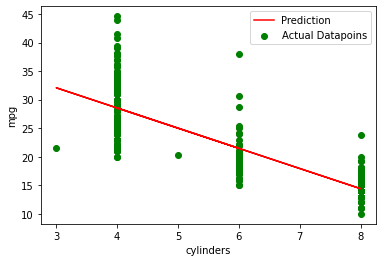

In [106]:
plt.scatter(X_test4,y_test4, color='GREEN', label = 'Actual Datapoins')
plt.plot(X_test4,y_pred5, color='RED',label= 'Prediction')
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.legend()

As we can see above, the prediction line has considerable distance from the datapoints, however distances decrease for the higher number of cylinders. That could be the reason for better r2 of this model (0.62) than two models before that.

# Extra Work as practice to be complete later for portfolio

## Cross Validation

whole X and y dataset

In [32]:
X = df1.values[:, :308]
y = df1.values[:, 308]

cross validation on model reg1

In [33]:
#instead of ormal fitting we can do cross validation
regr1_cv = cross_val_score(regr1,X, y ,cv=10) 
#it returns Array of scores of the estimator for each run of the cross validation.
np.mean(regr1_cv), np.std(regr1_cv)

(-2.149876270280681e+17, 3.8262984709700346e+17)

Why is it negative? DOes not make sense!

In [34]:
regr1_cv

array([ 4.15540998e-01,  7.19540519e-01, -7.31384674e+16, -1.66530269e+16,
        5.78833266e-01, -4.07589321e+15, -1.19206292e+18, -1.55444119e+17,
       -6.89247429e+17, -1.92544166e+16])

Cross-Validation on model lasso1

In [35]:
lasso1_cv = cross_val_score(lasso1,X, y ,cv=10)
np.mean(lasso1_cv), np.std(lasso1_cv)

(0.620113265607037, 0.2584080185642774)

Cross-Validation on model lasso2

In [36]:
lasso2_cv = cross_val_score(lasso2,X, y ,cv=10)
np.mean(lasso2_cv), np.std(lasso2_cv)

(0.636897439472416, 0.21608439493160614)

Why do we have lower scores for CV than nomrmal fits?

**Question: Does it help to normalize atributes?**

## Scaling

In [39]:
from sklearn import preprocessing

In [42]:
X_scaled = preprocessing.scale(X)

In [43]:
X_scaled.mean(axis=0)

array([-1.08756541e-16, -7.25043608e-17, -1.81260902e-16, -1.81260902e-17,
        4.35026165e-16, -1.16006977e-15,  1.35945676e-16, -9.06304510e-18,
        1.81260902e-17,  0.00000000e+00, -1.81260902e-17,  0.00000000e+00,
       -9.06304510e-18, -1.81260902e-17, -3.62521804e-17,  0.00000000e+00,
        0.00000000e+00, -1.81260902e-17, -9.06304510e-18,  1.81260902e-17,
        1.81260902e-17,  1.35945676e-17,  9.06304510e-18, -1.35945676e-17,
        0.00000000e+00, -9.06304510e-18,  0.00000000e+00,  0.00000000e+00,
        9.06304510e-18,  0.00000000e+00, -1.35945676e-17, -9.06304510e-18,
       -9.06304510e-18,  0.00000000e+00,  0.00000000e+00, -9.06304510e-18,
       -1.81260902e-17,  0.00000000e+00,  9.06304510e-18,  0.00000000e+00,
        0.00000000e+00, -2.26576127e-17,  1.81260902e-17,  1.35945676e-17,
        1.35945676e-17,  9.06304510e-18, -9.06304510e-18,  0.00000000e+00,
        0.00000000e+00, -9.06304510e-18, -6.79728382e-18, -9.06304510e-18,
       -9.06304510e-18, -

In [44]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Normalization

In [45]:
X_scaled2 = preprocessing.normalize(X)

In [46]:
X_scaled2.mean(axis=0)

array([1.83741101e-03, 6.11750235e-02, 3.47217321e-02, 9.96911754e-01,
       5.73310256e-03, 2.76109121e-02, 6.20580582e-04, 6.63874071e-07,
       6.58325365e-07, 6.91643820e-07, 1.63980745e-06, 7.45306850e-07,
       7.78823744e-07, 3.70595730e-06, 3.47888664e-06, 8.57159332e-07,
       3.48858073e-06, 1.25013190e-06, 7.91860707e-07, 7.95758732e-07,
       7.39332572e-07, 9.53599184e-07, 1.04761560e-06, 1.93111757e-06,
       1.16322472e-06, 8.99505669e-07, 8.63465956e-07, 1.14703607e-06,
       1.13820851e-06, 9.78786039e-07, 1.39611004e-06, 6.19283898e-07,
       8.63641060e-07, 5.41042004e-07, 7.52413306e-07, 5.12509750e-07,
       1.39822673e-06, 5.64529285e-07, 1.18060899e-06, 7.37803534e-07,
       8.36203747e-07, 1.70817130e-06, 6.86884043e-07, 9.52940875e-07,
       6.51017666e-07, 5.79997776e-07, 9.89298030e-07, 6.52903991e-07,
       5.72389134e-07, 8.62873692e-07, 1.88537818e-06, 9.77306398e-07,
       1.06261353e-06, 9.64403421e-07, 6.20353981e-07, 1.48823433e-06,
      

In [47]:
X_scaled2.std(axis=0)

array([2.53855710e-04, 1.77709092e-02, 5.87566041e-03, 1.19457116e-03,
       2.11609527e-03, 7.95885402e-03, 4.45092796e-04, 1.31272600e-05,
       1.30175414e-05, 1.36763712e-05, 2.29119062e-05, 1.47374889e-05,
       1.54002426e-05, 3.65301964e-05, 3.42879708e-05, 1.69492286e-05,
       3.07501068e-05, 1.74744856e-05, 1.56580318e-05, 1.57351103e-05,
       1.46193552e-05, 1.88562032e-05, 2.07152575e-05, 2.69726745e-05,
       2.30012799e-05, 1.77865732e-05, 1.70739340e-05, 2.26811700e-05,
       2.25066163e-05, 1.93542410e-05, 1.95393136e-05, 1.22455464e-05,
       1.70773964e-05, 1.06984131e-05, 1.48780100e-05, 1.01342243e-05,
       1.97951300e-05, 1.11628440e-05, 2.33450316e-05, 1.45891204e-05,
       1.65348587e-05, 2.40567359e-05, 1.35822527e-05, 1.88431860e-05,
       1.28730410e-05, 1.14687136e-05, 1.95621022e-05, 1.29103407e-05,
       1.13182624e-05, 1.70622227e-05, 2.15179603e-05, 1.93249830e-05,
       2.10118224e-05, 1.90698431e-05, 1.22667059e-05, 2.07892391e-05,
      

In [51]:
train_stats = df1.describe()
train_stats.pop("mpg")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.0,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.0,275.750,455.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.5,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.5,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.0,79.000,82.0
...,...,...,...,...,...,...,...,...
car_name_vw dasher (diesel),392.0,0.002551,0.050508,0.0,0.000,0.0,0.000,1.0
car_name_vw pickup,392.0,0.002551,0.050508,0.0,0.000,0.0,0.000,1.0
car_name_vw rabbit,392.0,0.005102,0.071337,0.0,0.000,0.0,0.000,1.0
car_name_vw rabbit c (diesel),392.0,0.002551,0.050508,0.0,0.000,0.0,0.000,1.0


In [54]:
type(train_stats.values)

numpy.ndarray

In [57]:
# def norm(x):
#   return ((x - train_stats['mean']).values / train_stats['std'].values)
# normed_data = norm(X)


In [ ]:
from sklearn.model_selection import KFold, ShuffleSplit

In [ ]:
kf = KFold(n_splits = 10)

In [ ]:
kf.split(X, y)